## Functions and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
# Set font size of plot elements\n",
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def temp_from_photons(ω_c, num_photons):
    hbar_ov_k = 7.639e-12 
    return hbar_ov_k * ω_c / np.log(1 / num_photons + 1)

In [4]:
def photons_from_temp(ω_c, temp):
    hbar_ov_k = 7.639e-12
    return (np.exp(hbar_ov_k * ω_c / temp) - 1) ** -1

In [5]:
def mean_photons_cavity(κ, ω_c, Q, r, g, nT, nc):
    """
    function for calculating the steady state photon number in the cavity per equation 98 in Kurt's supplemental info document
    """
    num = (κ + ω_c / Q) * nT + r * g ** 2 / ((r/2)**2 + (r/2)*((κ+ω_c / Q) / 2) + g ** 2) * nc
    den = (κ + ω_c / Q) + r * g ** 2 / ((r/2)**2 + (r/2)*((κ+ω_c / Q) / 2) + g ** 2)
    return num / den

In [6]:
def full_mean_photons_cav(κ, ω_c, γ, r, g, nT, nc, Δ):
    num = (κ + γ) * nT * ((κ + γ) * r / 4 + g ** 2 + r ** 2 / 4 + 1j * r * Δ / 2) + g * r ** 2 * nc
    den = (-Δ + 1j * (r + κ + γ) / 2) * ((κ + γ) * r / 4 + g ** 2 + 1j * r * Δ / 2)
    return 0.5 * np.abs(num / den)

## Temp as function of g and $\Delta$

In [7]:
# Define parameters
κ = 1e4
ω = 0                                           
ωc = 2.87 * 2 * np.pi * 1e9        
hbar_ov_k = 7.639e-12   
Q = 2.5e4
T = 5
nT = photons_from_temp(ωc, T) 

In [8]:
# Create ranges of Δ and g
g = np.logspace(6, 8, 10000)
r = g.copy()
γ = 1e4#0.5*g.copy()
P = np.linspace(0.1, 0.8, 1000)
nc = 0.5 * (1 - P) / P
print(temp_from_photons(ωc, nc))

[0.68645855 0.68164976 0.67690721 0.67222953 0.66761539 0.6630635
 0.6585726  0.65414149 0.64976895 0.64545384 0.64119503 0.63699142
 0.63284194 0.62874554 0.62470121 0.62070796 0.61676483 0.61287086
 0.60902515 0.6052268  0.60147493 0.5977687  0.59410727 0.59048983
 0.58691559 0.58338378 0.57989364 0.57644443 0.57303545 0.56966597
 0.56633532 0.56304283 0.55978784 0.55656971 0.55338782 0.55024155
 0.54713031 0.5440535  0.54101057 0.53800095 0.53502408 0.53207945
 0.52916652 0.52628478 0.52343373 0.52061289 0.51782176 0.51505988
 0.5123268  0.50962205 0.5069452  0.50429582 0.50167348 0.49907776
 0.49650827 0.49396461 0.49144638 0.4889532  0.48648469 0.4840405
 0.48162026 0.47922362 0.47685023 0.47449975 0.47217185 0.46986621
 0.4675825  0.46532041 0.46307964 0.46085987 0.45866082 0.45648219
 0.4543237  0.45218507 0.45006602 0.44796628 0.44588559 0.44382369
 0.44178032 0.43975524 0.43774818 0.43575893 0.43378722 0.43183284
 0.42989556 0.42797514 0.42607136 0.42418402 0.42231289 0.420457

In [9]:
gm, Pm = np.meshgrid(g, P)
rm = 0.5*gm.copy()
ncm = 0.5 * (1 - Pm) / Pm
nbar = full_mean_photons_cav(κ, ωc, γ, rm, gm, nT, ncm, 0)

0.05237836101249686


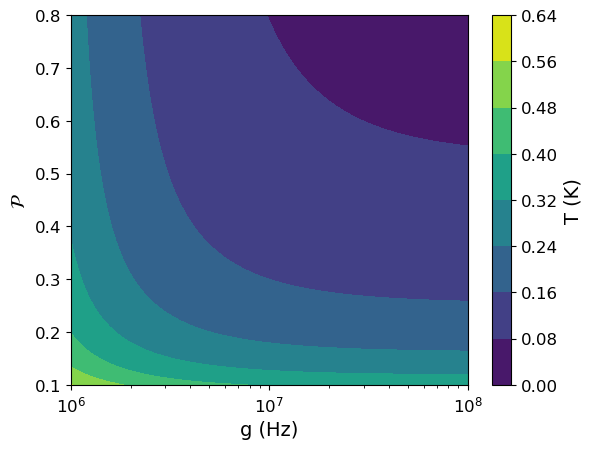

In [10]:
t = temp_from_photons(ωc, nbar)
print(t.min())
plt.contourf(gm, Pm, temp_from_photons(ωc, nbar))
plt.xlabel("g (Hz)")
plt.ylabel("$\\mathcal{P}$")
plt.xscale('log')
plt.colorbar(label='T (K)')
plt.savefig("pol_g_sweep.png", format='png', dpi=300)

In [11]:
print(temp_from_photons(ωc, nbar).min())

0.05237836101249686


In [12]:
(1 / (1 + nbar)).max()

0.9279174442484256

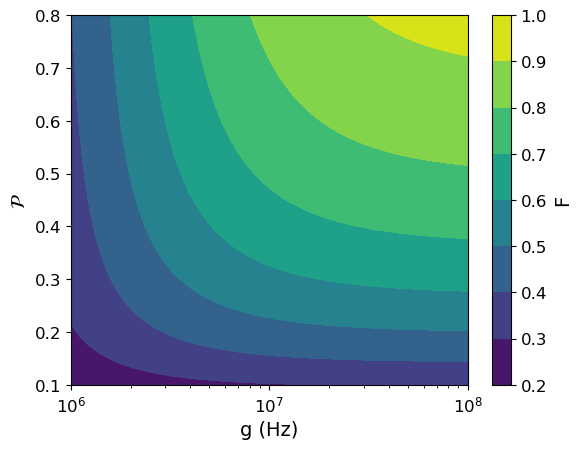

In [13]:
plt.contourf(gm, Pm, 1 / (1 + nbar))
plt.xlabel("g (Hz)")
plt.ylabel("$\\mathcal{P}$")
plt.xscale('log')
plt.colorbar(label='F')

In [14]:
# Want power to reach P = 0.7
p = 0.7
a1 = 0.06
a2 = 2.1e3
a3 = 2.2e-11
δ = 734e6
inv_T1 = a1 + a2 / (np.exp(δ / (8.6e-5 * T)) - 1) + a3 * T ** 5
γ_th = 0.5 * inv_T1
print("γ_th: ", γ_th)
γ_opt = 3 * γ_th * p / (0.29 - 0.38 * p)
print("γ_opt: ", γ_opt)

γ_th:  0.030000034374999998
γ_opt:  2.6250030078124973


/tmp/ipykernel_23567/2213014743.py:7: RuntimeWarning: overflow encountered in exp
  inv_T1 = a1 + a2 / (np.exp(δ / (8.6e-5 * T)) - 1) + a3 * T ** 5


In [15]:
# The cross-section is 
σ_a = 3e-17 #cm^2

# for a 532 nm laser, the energy per photon is
h = 6.626e-34
c = 3e8
λ = 532e-9
Ep = h * c / λ # J

# If we assume that the diamond is oriented so that the thin edge is along the direction of propagation of the laser, the area the laser
# should cover is 0.3 * 0.3 cm^2
A = 0.3 * 0.3  # cm^2

In [16]:
# So the power is
P = γ_opt * Ep * A / σ_a
print("P = %3e W" % P)

P = 2.942470e-03 W


## Plot of base temp vs cool temp

In [17]:
κ = 0
ω = 0                                           
ωc = 2.87 * 2 * np.pi * 1e9        
hbar_ov_k = 7.639e-12   
#Q = 2.5e4
γ = 2*1e6
P = 0.7
nc = 0.5 * (1 - P) / P

In [18]:
g = 1e6
r = g

In [19]:
base_temps = np.linspace(4, 300, 1000)
base_nT = photons_from_temp(ωc, base_temps)

In [20]:
nbars = full_mean_photons_cav(κ, ωc, γ, g, r, base_nT, nc, 0)

In [21]:
cool_temps = temp_from_photons(ωc, nbars)

Text(0, 0.5, 'Cool Temp')

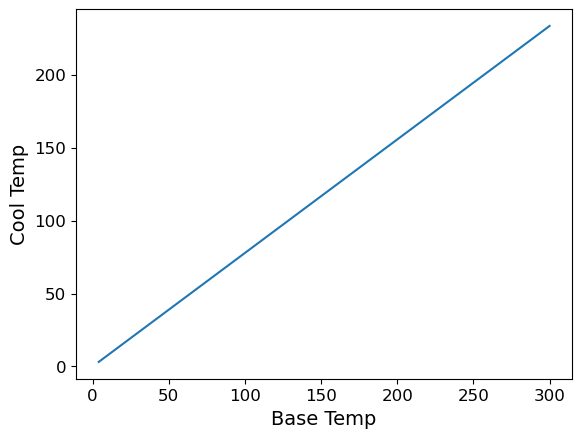

In [22]:
plt.plot(base_temps, cool_temps)
plt.xlabel("Base Temp")
plt.ylabel("Cool Temp")

In [23]:
print(nc)

0.21428571428571433


In [24]:
Ps = np.linspace(0.1, 0.7, 7)
ncs = 0.5 * (1 - Ps) / Ps

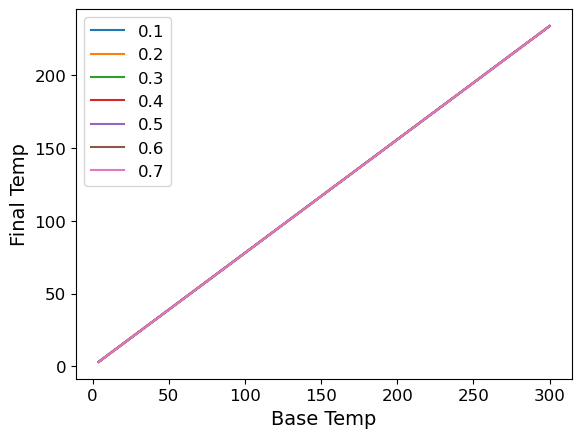

In [25]:
plt.figure(1)
for _ in Ps:
    nc = 0.5 * (1 - _) / _
    nbars = full_mean_photons_cav(κ, ωc, γ, g, r, base_nT, nc, 0)
    cool_temps = temp_from_photons(ωc, nbars)
    plt.plot(base_temps, cool_temps, label=str(_))

plt.xlabel("Base Temp")
plt.ylabel("Final Temp")
#plt.xlim([4, 5])
#plt.ylim([0, 4])
plt.legend()

In [26]:
Tm, Ps = np.meshgrid(base_temps, Ps)
ntm = photons_from_temp(ωc, Tm)
ncsm = 0.5 * (1 - Ps) / Ps
nbars = full_mean_photons_cav(κ, ωc, γ, g, r, ntm, ncsm, 0)
cool_temps = temp_from_photons(ωc, nbars)

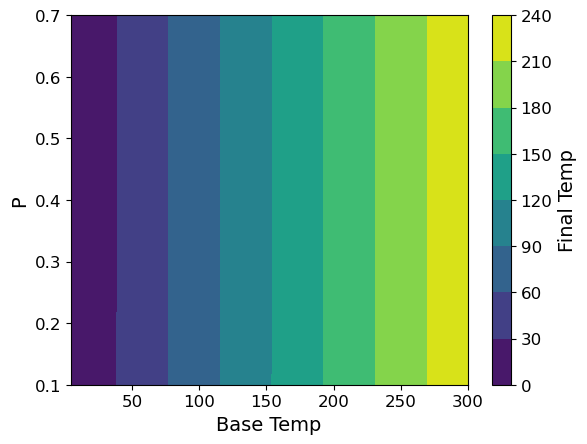

In [27]:
plt.contourf(Tm, Ps, cool_temps)
plt.xlabel("Base Temp")
plt.ylabel("P")
plt.colorbar(label='Final Temp')

But Q depends on the temperature.  According to what I remember talking about this with Ethan, Q is ~1e4 at 300 K and ~2.5e4 at 5 K.